# Metropolis Sampling for a 1D Distribution

This notebook demonstrates the Metropolis algorithm for sampling from a 1D distribution with an unnormalized density $f(x) = e^{-x^4}$. It visualizes the trace plot, compares the sample histogram to the true (normalized) density, and shows the convergence of the sample mean.

**Concept:**
- The Metropolis algorithm is an MCMC method for sampling from a distribution when only an unnormalized density is available.
- At each step, a new candidate is proposed and accepted or rejected based on the ratio of densities.

## 1. Import Required Libraries and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import sys, os

# Add the project root directory to the Python path
current_dir = os.getcwd()
if os.path.basename(current_dir) == 'notebooks':
    project_root = os.path.abspath(os.path.join(current_dir, '..'))
else:
    project_root = current_dir
if project_root not in sys.path:
    sys.path.insert(0, project_root)

try:
    from src.mcmc.metropolis_hastings import metropolis_sampler, target_pdf_unnormalized
    print("Successfully imported metropolis_sampler and target_pdf_unnormalized from src")
except ImportError as e:
    print(f"Error importing metropolis_sampler: {e}")
    print("Please ensure you are running this notebook from the 'learn_statistics' root directory or the 'notebooks' subdirectory.")

Successfully imported metropolis_sampler and target_pdf_unnormalized from src


## 2. Set Parameters for the Sampler

In [2]:
proposal_std = 1.0
num_samples = 50000
burn_in = 5000

print(f"Proposal std: {proposal_std}, num_samples: {num_samples}, burn_in: {burn_in}")

Proposal std: 1.0, num_samples: 50000, burn_in: 5000


## 3. Run the Metropolis Sampler

In [3]:
samples, acceptance_rate = metropolis_sampler(target_pdf_unnormalized, proposal_std, num_samples, burn_in)
print(f"Generated {len(samples)} samples after burn-in.")
print(f"Acceptance rate: {acceptance_rate:.4f}")

Generated 45000 samples after burn-in.
Acceptance rate: 0.5872


## 4. Visualize Trace Plot and Histogram vs Target PDF

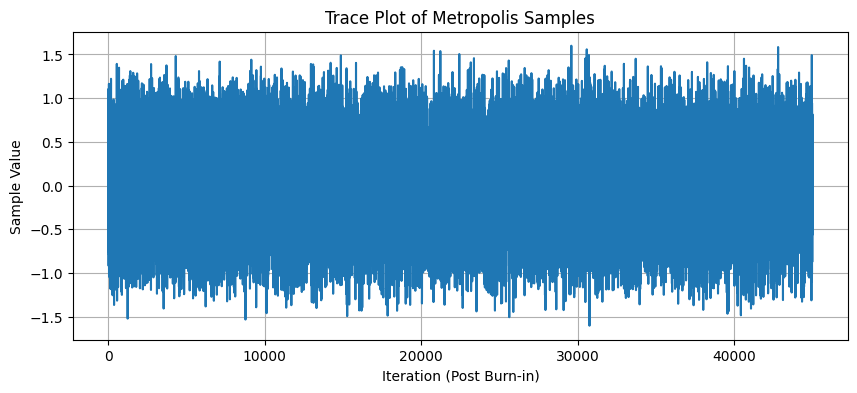

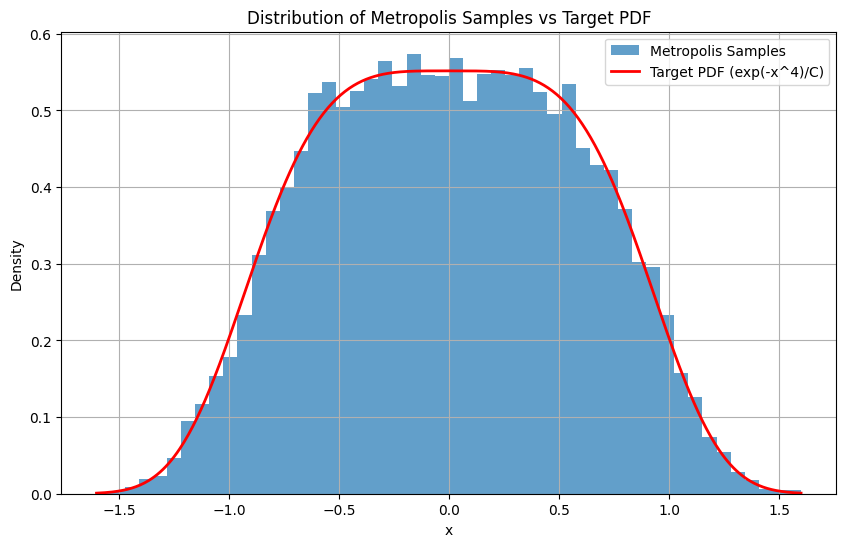

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(samples)
plt.title('Trace Plot of Metropolis Samples')
plt.xlabel('Iteration (Post Burn-in)')
plt.ylabel('Sample Value')
plt.grid(True)
plt.show()

# Histogram vs target PDF
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, label='Metropolis Samples')
# Normalize the target PDF
norm_constant, _ = quad(target_pdf_unnormalized, -np.inf, np.inf)
x_range = np.linspace(min(samples), max(samples), 500)
target_pdf_normalized = target_pdf_unnormalized(x_range) / norm_constant
plt.plot(x_range, target_pdf_normalized, 'r-', lw=2, label='Target PDF (exp(-x^4)/C)')
plt.title('Distribution of Metropolis Samples vs Target PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## 5. Convergence of Sample Mean and Absolute Error

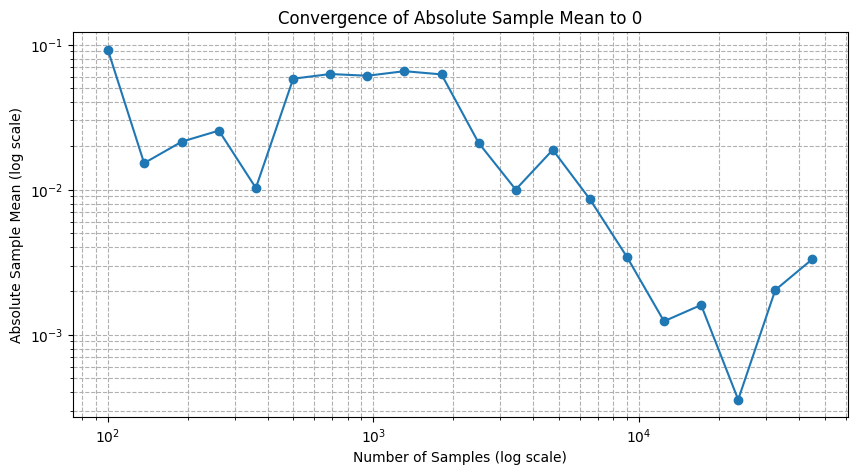

In [5]:
# Theoretical mean is 0 due to symmetry
sample_means = [np.mean(samples[:i]) for i in np.logspace(2, np.log10(len(samples)), 20, dtype=int)]
steps = [i for i in np.logspace(2, np.log10(len(samples)), 20, dtype=int)]
plt.figure(figsize=(10, 5))
plt.plot(steps, np.abs(sample_means), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Absolute Sample Mean (log scale)')
plt.title('Convergence of Absolute Sample Mean to 0')
plt.grid(True, which='both', ls='--')
plt.show()

The plots show that the Metropolis sampler produces samples from the target distribution, and the sample mean converges to the theoretical mean (0) as the number of samples increases.